Kilka uwag:
- W projekcie wymagany jest plik requirements.txt, warto byłoby pozbyć się pip installów z notebooka
- w wykresach dla kolumn Payment Method oraz Product Category kolejności ketegori są różne pomiędzy danymi z fradów i non-fraudów
- w histogramie dla Transaction Amount jest duża różnica w skali pomiędzy fraudami i non-fraudami. Aby uwydatnić pomiędzy wsoką wkotą transakcji a frudami dodałyśmy wykres ze zbliżeniem na ogon histogramu

## Wasz kod

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install kagglehub
%pip install qgrid
%pip install ipydatagrid
%pip install scikit-learn
%pip install imblearn


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for kagglehub from https://files.pythonhosted.org/packages/41/f5/d1fb003b997cccda7e7567e9768ab1ad5f4be014875773299c67c62b3b96/kagglehub-0.3.10-py3-none-any.whl.metadata
  Using cached kagglehub-0.3.10-py3-none-any.whl.metadata (31 kB)
Using cached k

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [3]:
path = kagglehub.dataset_download("kevinvagan/fraud-detection-dataset")
dataset_path = os.path.join(path, 'Dataset')

df1 = pd.read_csv(os.path.join(dataset_path, 'Dataset1.csv'))
df2 = pd.read_csv(os.path.join(dataset_path, 'Dataset2.csv'))

In [4]:
from sklearn.model_selection import train_test_split

# Definiujemy cechy (X) i etykiety (y) na podstawie df1
X = df1.drop(columns=['Is Fraudulent'])
y = df1['Is Fraudulent']

# Podział na temp (70%) i test (30%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=777)

# Podział temp
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.3, stratify=y_temp, random_state=777)

# Sprawdzenie rozmiarów
print(f"Train: {X_train.shape}, Valid: {X_valid.shape}, Test: {X_test.shape}")
print(f"Proporcje klas w train: {y_train.value_counts(normalize=True)}")
print(f"Proporcje klas w valid: {y_valid.value_counts(normalize=True)}")
print(f"Proporcje klas w test: {y_test.value_counts(normalize=True)}")

Train: (721746, 15), Valid: (309320, 15), Test: (441886, 15)
Proporcje klas w train: Is Fraudulent
0    0.94987
1    0.05013
Name: proportion, dtype: float64
Proporcje klas w valid: Is Fraudulent
0    0.949871
1    0.050129
Name: proportion, dtype: float64
Proporcje klas w test: Is Fraudulent
0    0.949872
1    0.050128
Name: proportion, dtype: float64


In [5]:
# Funkcja do wizualizacji rozkładów zmiennych numerycznych
def plot_distribution_histograms(X, y, variable, num_bins, xlim_range, save_path='histogram.png'):
  
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    bins = np.linspace(xlim_range[0], xlim_range[1], num_bins)

    axes[0].hist(X[variable], bins=bins, color='skyblue')
    axes[0].set_title('Cały zbiór X')
    axes[0].set_ylabel('Liczba rekordów')

    axes[1].hist(X[y == 0][variable], bins=bins, color='green')
    axes[1].set_title('Non-Fraud')
    axes[1].set_ylabel('Liczba rekordów')

    axes[2].hist(X[y == 1][variable], bins=bins, color='red')
    axes[2].set_title('Fraud')
    axes[2].set_ylabel('Liczba rekordów')

    for ax in axes:
        ax.set_xlim(xlim_range)
        ax.set_xlabel(variable)

    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

## Dodatkowy histogram
Pokazuje jak dużo z wysoko wartościowych transakcji jest fradowych

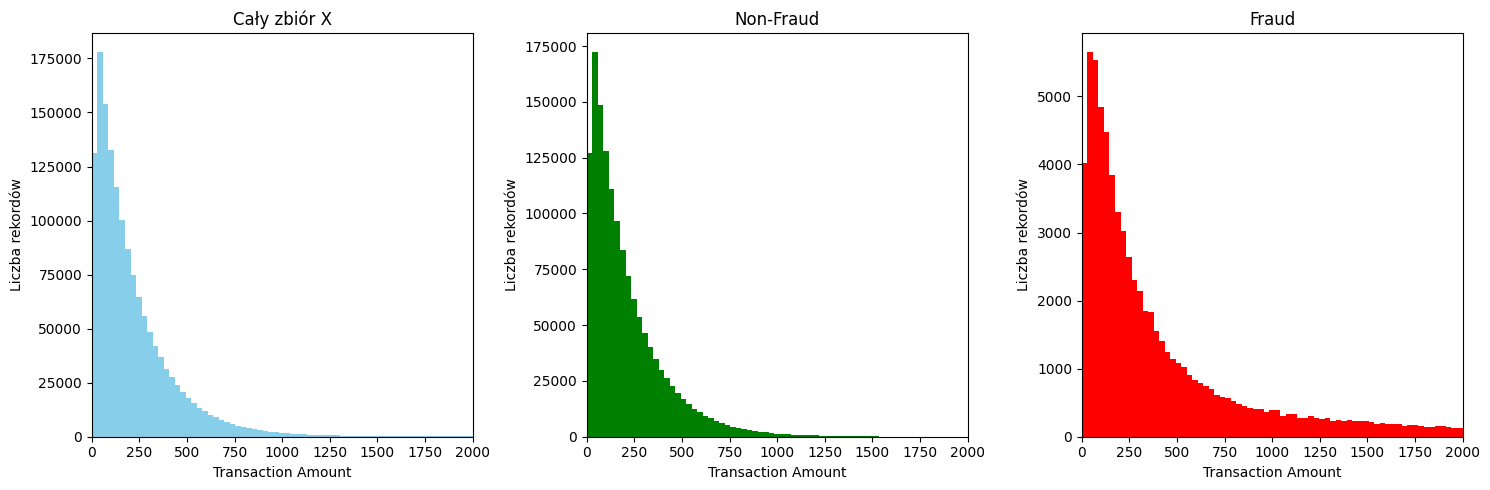

In [6]:
# Rozkład 'Transaction Amount'
plot_distribution_histograms(X, y, variable='Transaction Amount', num_bins=70, xlim_range=(0, 2000), save_path='transaction_amount_hist_different_scales.png')

Histogram dla duzych płatności

<Axes: xlabel='Transaction Amount', ylabel='Count'>

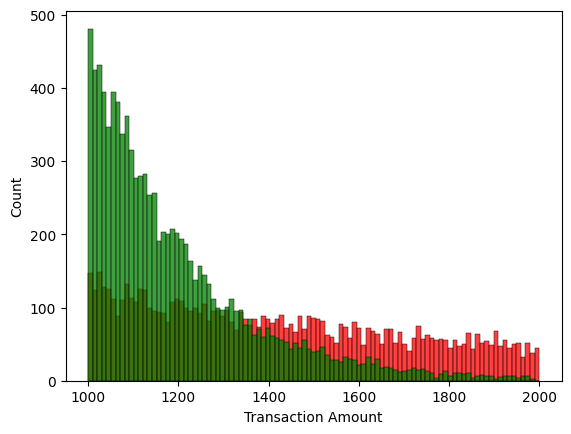

In [7]:
bins = np.linspace(1000, 2000, 100)
sns.histplot(X[y==1]["Transaction Amount"], bins=bins, color='red')
sns.histplot(X[y==0]["Transaction Amount"], bins=bins, color='green')